In [1]:
#Null Data 처리 함수
def fillna(df):
    df['Age'].fillna(df_titanic['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

In [2]:
#머신러닝 알고리즘에 불필요한 feature 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

In [3]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
def encode_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features=['Cabin','Sex','Embarked']
    for feature in features:
        encoder=LabelEncoder()
        encoder.fit(df[feature])
        df[feature]=encoder.transform(df[feature])
    return df

In [4]:
#whole preprocessing method
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=encode_features(df)
    return df

In [5]:
#성능 지표 구하는 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
def get_clf_eval(y_test,pred):
    confusion=confusion_matrix(y_test,pred)
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    
    print('Confusion Matrixs')
    print(confusion)
    print('Accuracy:{0:.4f},Precision{1:.4f},Recall:{2:.4f},F1_score{3:.4f}:'.format(accuracy,precision,recall,f1))

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

df_titanic=pd.read_csv('train.csv')
df_y_titanic=df_titanic['Survived']
df_x_titanic=df_titanic.drop('Survived',axis=1)
df_x_titanic=transform_features(df_x_titanic)

x_train,x_test,y_train,y_test=train_test_split(df_x_titanic,df_y_titanic,test_size=0.2,random_state=11)
lr_clf=LogisticRegression()

lr_clf.fit(x_train,y_train)
pred= lr_clf.predict(x_test)
get_clf_eval(y_test,pred)



Confusion Matrixs
[[108  10]
 [ 14  47]]
Accuracy:0.8659,Precision0.8246,Recall:0.7705,F1_score0.7966:


c:\users\sun\venv\ml\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
#p/r curve
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]

#Thresholds의 값을 변화시킨면서y_test(정답)와 pred_proba_class1(예측)에 따른 P/R값의 그래프를 구한다.
precisions, recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)  
print('Shape Of Thresholds List:',thresholds.shape)

thr_index=np.arange(0,thresholds.shape[0],15)
print('Sample Threshold Index:',thr_index)
print('Sample Threshold Value:',np.round(thresholds[thr_index],2))

print('Sample Threshold Precision:',np.round(precisions[thr_index],3))
print('Sample Threshold Recall:',np.round(recalls[thr_index],3))

Shape Of Thresholds List: (147,)
Sample Threshold Index: [  0  15  30  45  60  75  90 105 120 135]
Sample Threshold Value: [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
Sample Threshold Precision: [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
Sample Threshold Recall: [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


In [8]:
#p/r 그래프 함수 정의
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds=precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    #x축의 lim 값으로 x축의 좌표를 만듦
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

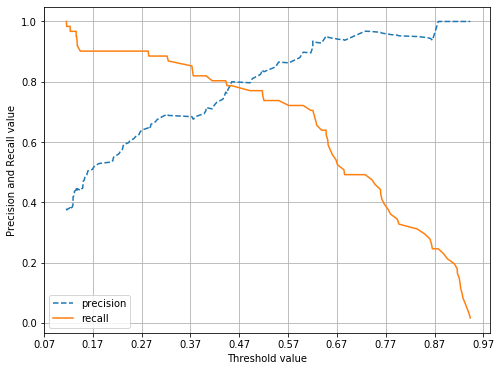

In [9]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

In [10]:
#f1_score를 이용한 성능지표 확인, Binarizer api 이용
from sklearn.preprocessing import Binarizer
X=[[1,-1,2],[2,0,0],[0,1.1,1.2]]
binarizer=Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [11]:
#Thresholds값에 따른 성능 지표 구하는 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
from sklearn.preprocessing import Binarizer
def get_eval_by_thresholds(y_test,pred_proba_c1,thresholds):
    for custom_thresholds in thresholds:
        binarizer=Binarizer(threshold=custom_thresholds).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print('Threshold:',custom_thresholds)
        get_clf_eval(y_test,custom_predict)


In [12]:
thresholds=[0,4,0.45,0.50,0.55,0.60]
pred_proba=lr_clf.predict_proba(x_test)
get_eval_by_thresholds(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

Threshold: 0
Confusion Matrixs
[[  0 118]
 [  0  61]]
Accuracy:0.3408,Precision0.3408,Recall:1.0000,F1_score0.5083:
Threshold: 4
Confusion Matrixs
[[118   0]
 [ 61   0]]
Accuracy:0.6592,Precision0.0000,Recall:0.0000,F1_score0.0000:
Threshold: 0.45
Confusion Matrixs
[[105  13]
 [ 13  48]]
Accuracy:0.8547,Precision0.7869,Recall:0.7869,F1_score0.7869:
Threshold: 0.5
Confusion Matrixs
[[108  10]
 [ 14  47]]
Accuracy:0.8659,Precision0.8246,Recall:0.7705,F1_score0.7966:
Threshold: 0.55
Confusion Matrixs
[[111   7]
 [ 16  45]]
Accuracy:0.8715,Precision0.8654,Recall:0.7377,F1_score0.7965:
Threshold: 0.6
Confusion Matrixs
[[113   5]
 [ 17  44]]
Accuracy:0.8771,Precision0.8980,Recall:0.7213,F1_score0.8000:


c:\users\sun\venv\ml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sun\venv\ml\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
#ROC_curve api를 이용한 roc curve 시각화
from sklearn.metrics import roc_curve

pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]
fprs,tprs,thresholds=roc_curve(y_test,pred_proba_class1)
print('Shape Of Thresholds List:',thresholds.shape)

thr_index=np.arange(0,thresholds.shape[0],15)
print('Sample Threshold Index:',thr_index)
print('Sample Threshold Value:',np.round(thresholds[thr_index],2))

print('Sample Threshold FPR:',np.round(fprs[thr_index],3))
print('Sample Threshold TPR:',np.round(tprs[thr_index],3))

Shape Of Thresholds List: (48,)
Sample Threshold Index: [ 0 15 30 45]
Sample Threshold Value: [1.94 0.55 0.15 0.12]
Sample Threshold FPR: [0.    0.059 0.559 0.847]
Sample Threshold TPR: [0.    0.738 0.902 0.984]


In [14]:
#roc_curve 그래프 그리는 함수
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def ROC_curve_plot(y_test, pred_proba_c1):
    fprs,tprs,thresholds=roc_curve(y_test,pred_proba_c1)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    #x축의 lim 값으로 x축의 좌표를 만듦
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.legend()
    plt.grid()
    plt.show()

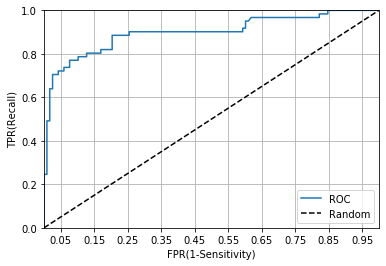

In [15]:
ROC_curve_plot(y_test,pred_proba_class1)

In [16]:
#roc_auc_score api를 이용한 AUC 구하기
from sklearn.metrics import roc_auc_score

pred=lr_clf.predict(x_test)
roc_score=roc_auc_score(y_test,pred)
print('ROC AUC 값:{0:.4f}'.format(roc_score))

ROC AUC 값:0.8429


In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
iris=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)

dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [18]:
!python -m pip install graphviz

In [19]:
#graphviz lib를 이용한 decisionTree 모델 시각화1
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file="tree.dot",class_names=iris.target_names,feature_names=iris.feature_names,impurity=True,filled=True)


In [1]:
#graphviz lib를 이용한 decisionTree 모델 시각화2
import graphviz
with open(r'C:\Users\Sun\jupyternotebook\tree.dot','encoding='UTF-8')as f:
    dot_graph=f.read()
    
graphviz.Source(dot_graph)

SyntaxError: invalid syntax (<ipython-input-1-30eb3747ae26>, line 3)